##### <h1 id="aa" style="color:white;background:#00b5b6;padding:15px;border-radius:15px"> Pneumonia diagnosis using X-ray of patients </h1>

> ### Pneumonia is an infection that inflames the air sacs in one or both lungs.

<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> Symptoms </h1>

The signs and symptoms of pneumonia vary from mild to severe, depending on factors such as the type of germ causing the infection, and your age and overall health. Mild signs and symptoms often are similar to those of a cold or flu, but they last longer.

<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> Signs and symptoms of pneumonia may include: </h1>

1. Chest pain when you breathe or cough
2. Confusion or changes in mental awareness (in adults age 65 and older)
3. Cough, which may produce phlegm
4. Fatigue
5. Fever, sweating and shaking chills
6. Lower than normal body temperature (in adults older than age 65 and people with weak immune systems)
7. Nausea, vomiting or diarrhea
8. Shortness of breath

<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> Risk factors </h1>

1. Bacteria in the bloodstream (bacteremia)
2. Difficulty breathing
3. Fluid accumulation around the lungs (pleural effusion)
4. Lung abscess

![Pneumonia](https://img.freepik.com/free-vector/pneumonia-realistic-infographic_1284-59342.jpg?w=2000)

Using X-ray images of lungs we can diagnosis the patient's status on Pneumonia...
> **Hope this notebook will help you in implementing LeNet-5 with your custom dataset!.**

<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> Importing required libraries </h1>

In [1]:
import numpy as np
import pandas as pd

import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import glob
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils.vis_utils import plot_model
from PIL import Image


<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> Directories of training , testing & validation data </h1>

In [2]:
train_directory="/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/"
val_directory="/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/"
test_directory="/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/"

<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> Getting the class names </h1>

In [3]:
data_dir = train_directory
class_names=os.listdir(train_directory)
class_names.pop()
print(class_names)

['PNEUMONIA', 'NORMAL']


<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> Function to display random images... </h1>

In [4]:
def view_random_image(target_directory, target_class):
    target_folder = target_directory + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    return img

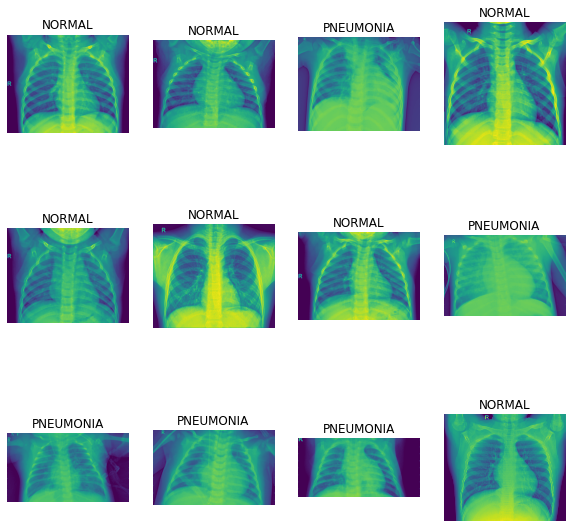

In [5]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    r=random.randint(0,1)
    img = view_random_image(data_dir, class_names[r])    

<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> Random vizualization from all directories </h1>


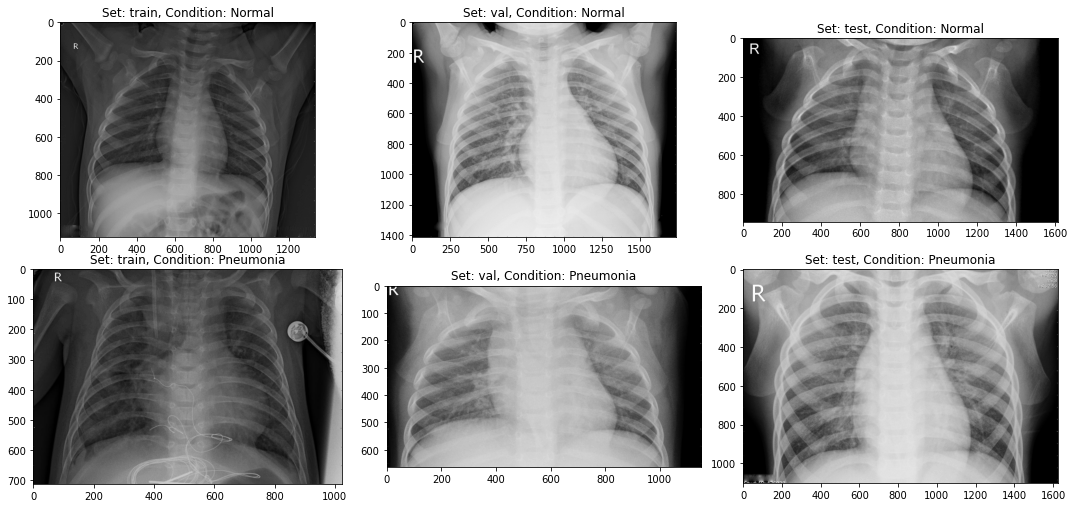

In [6]:
input_path="../input/chest-xray-pneumonia/chest_xray/chest_xray/"
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Pneumonia'.format(_set))


<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> No. of images present in each set </h1>

In [7]:
for _set in ['train', 'val', 'test']:
    n_normal = len(os.listdir(input_path + _set + '/NORMAL'))
    n_infect = len(os.listdir(input_path + _set + '/PNEUMONIA'))
    print('Set: {}, Normal images: {}, pneumonia images: {}'.format(_set, n_normal, n_infect))

Set: train, Normal images: 1342, pneumonia images: 3876
Set: val, Normal images: 9, pneumonia images: 9
Set: test, Normal images: 234, pneumonia images: 390


<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> Let's fetch the dataset from the directories </h1>

In [8]:
# Re-sizing the images
IMAGE_SIZE = (224, 224)
# Default batch size
BATCH_SIZE = 32

<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> Keras ImageDataGenerator </h1>

>It is used for getting the input of the original data and further, it makes the transformation of this data on a random basis and gives the output resultant containing only the data that is newly transformed. It does not add the data. Keras image data generator class is also used to carry out data augmentation where we aim to gain the overall increment in the generalization of the model. Operations such as rotations, translations, shearin, scale changes, and horizontal flips are carried out randomly in data augmentation using an image data generator.
![ImageDataGenerator](http://ai.stanford.edu/blog/assets/img/posts/2020-04-20-data-augmentation/fig1.png)



> ## ***This is how it looks like !...***
![ImageDataGenerator_sample](https://miro.medium.com/max/1200/1*Ukc49J8TzyxiOD30EqOWwQ.png)


In [9]:
Image_gen = ImageDataGenerator(
        rescale = 1/255,
        shear_range=10,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest'
)
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)

<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> Flow from directory </h1>

This method is useful when the images are sorted and placed in there respective class/label folders. This method will identify classes automatically from the folder name. 
![Flow from directory](https://i.imgur.com/iF6vvjp.png)

In [10]:
train = Image_gen.flow_from_directory(train_directory,
                                       batch_size=32,
                                       class_mode='binary',
#                                        target_size=(224,224,3))
                                       )

validation = Image_gen.flow_from_directory(val_directory,
                                              batch_size=2,
                                              class_mode='binary',
#                                               target_size=(224,224,3))
                                            )

test = val_Datagen.flow_from_directory(test_directory,
                                       batch_size=2,
                                       class_mode='binary',
#                                        target_size=(224/,224,3))
                                      )


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
img, label = next(train)

<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> Early Stopping </h1>

In machine learning, early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration. Up to a point, this improves the learner's performance on data outside of the training set. Past that point, however, improving the learner's fit to the training data comes at the expense of increased generalization error. Early stopping rules provide guidance as to how many iterations can be run before the learner begins to over-fit. Early stopping rules have been employed in many different machine learning methods, with varying amounts of theoretical foundation.

![Early stopping](https://peltarion.com/static/early_stopping_pa2.png)

In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10)

<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> ReduceLROnPlateau </h1>

Reduce learning rate when a metric has stopped improving.

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

![ReduceLROnPlateau](https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png)

In [13]:
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                          patience=8)

<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> ResNet50V2 model </h1>
**Reference**

[Deep Residual Learning for Image Recognition (CVPR 2015)](https://arxiv.org/abs/1512.03385)

ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database . The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

![ResNet50](https://www.mdpi.com/BDCC/BDCC-06-00029/article_deploy/html/images/BDCC-06-00029-g011.png)

In [14]:
def create_model():
    resnet_model = tf.keras.applications.ResNet50V2(
        weights='imagenet',
        include_top = False,
        input_shape = (224,224,3)
    )

    for layer in resnet_model.layers:
        layer.trainable=False

    x = resnet_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(128,activation='relu')(x)
    # output layer
    predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

    res_model = tf.keras.Model(inputs=resnet_model.input, outputs=predictions)

    # Compiling the model
    res_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    return res_model


In [15]:
res_model = create_model()

2022-09-05 15:46:56.242752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-05 15:46:56.400443: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-05 15:46:56.401354: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-05 15:46:56.403238: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94683136/94668760 [==============================] - 0s 0us/step


In [16]:
res_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

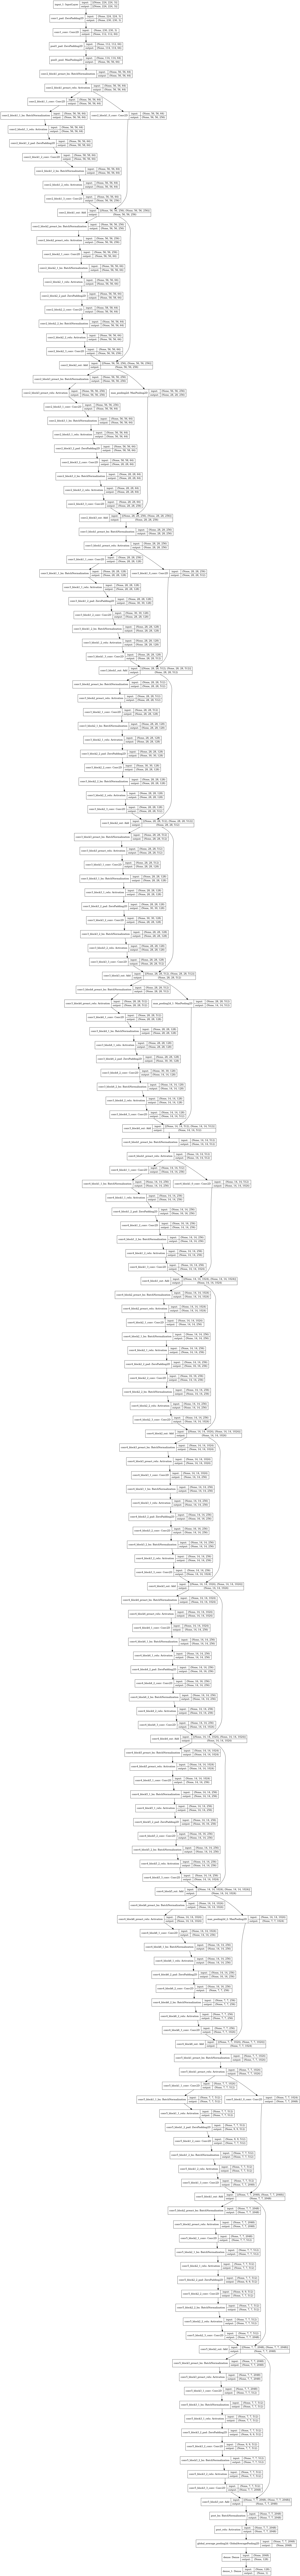

In [17]:
plot_model(res_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))

In [18]:
history = res_model.fit(train,epochs=30, 
                    validation_data=validation,
                     steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

2022-09-05 15:47:12.500583: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-09-05 15:47:17.154302: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


100/100 [==============================] - 115s 1s/step - loss: 0.3134 - accuracy: 0.8622 - val_loss: 0.4376 - val_accuracy: 0.7500
Epoch 2/30
100/100 [==============================] - 94s 937ms/step - loss: 0.2040 - accuracy: 0.9153 - val_loss: 0.4048 - val_accuracy: 0.8750
Epoch 3/30
100/100 [==============================] - 88s 873ms/step - loss: 0.1779 - accuracy: 0.9325 - val_loss: 1.0024 - val_accuracy: 0.6875
Epoch 4/30
100/100 [==============================] - 86s 859ms/step - loss: 0.1692 - accuracy: 0.9356 - val_loss: 0.5941 - val_accuracy: 0.7500
Epoch 5/30
100/100 [==============================] - 85s 849ms/step - loss: 0.1659 - accuracy: 0.9328 - val_loss: 0.5077 - val_accuracy: 0.7500
Epoch 6/30
100/100 [==============================] - 85s 848ms/step - loss: 0.1580 - accuracy: 0.9297 - val_loss: 0.4924 - val_accuracy: 0.8125
Epoch 7/30
100/100 [==============================] - 85s 851ms/step - loss: 0.1681 - accuracy: 0.9316 - val_loss: 0.8003 - val_accuracy: 0.750

<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> Accuracy & Loss each epochs </h1>




Text(0, 0.5, 'Loss')

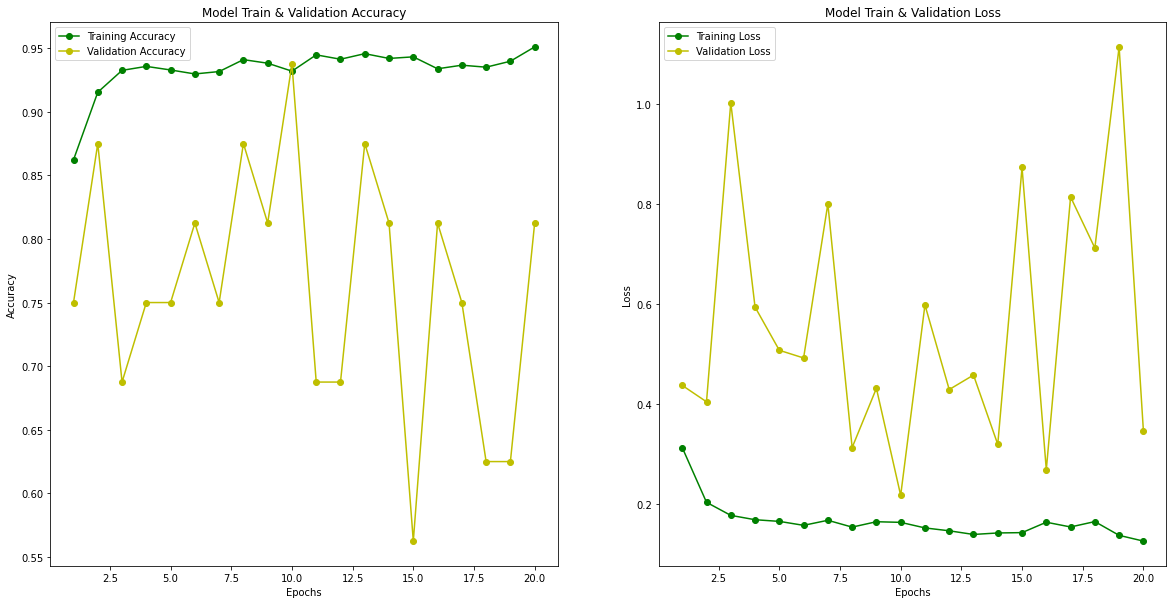

In [19]:
#Plot the training artifacts
fig , ax = plt.subplots(1, 2)
fig.set_size_inches(20, 10)

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs, train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'yo-' , label = 'Validation Accuracy')
ax[0].set_title('Model Train & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs, val_loss , 'yo-' , label = 'Validation Loss')
ax[1].set_title('Model Train & Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')



<h1 id="aa" style="color:white;background:#00b5b6;padding:8px;border-radius:8px"> Model evaluation with training and testing data ! </h1>


In [20]:
# Evaluating the model on train and test
score = res_model.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = res_model.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])


163/163 [==============================] - 137s 840ms/step - loss: 0.1283 - accuracy: 0.9502
Train Loss:  0.12833426892757416
Train Accuracy:  0.9501533508300781
312/312 [==============================] - 12s 39ms/step - loss: 0.2017 - accuracy: 0.9167

Test loss:  0.20165501534938812
Test Accuracy:  0.9166666865348816


## **[Take a look at my other notebooks here](https://www.kaggle.com/danushkumarv/code) and leave your helpful feedbacks <3**